# RocketML text topic modeling using SVD
## Import Libraries

In [67]:
from rocketml.io import DocumentSet
from rocketml.decomposition import LatentDirichletAllocation, TruncatedSVD
from rocketml.preprocessing import TextFilter
from rocketml import Pipeline
import sys
import pandas as pd
import seaborn as sns

from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.ranges import Range1d

%matplotlib inline

## Create Document Set

In [68]:
output_notebook()

Loading BokehJS ...

In [69]:
filename = "/home/ubuntu/text/corpus/911report/corpus_list.txt"
docset = DocumentSet(filename=filename)
tf = TextFilter(filters="lowercase,alpha,length,stem,utf8,stop_word")
lda = LatentDirichletAllocation()
pipeline = Pipeline([tf,lda])
X = pipeline.fit_transform(docset)

/home/ubuntu/.local/lib/python3.6/site-packages/rocketml/io/text.py:77: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  self.logger.warn("%s is not accessible for reading -- skipping"%dirname)


Number of documents=35
------------------
Cluster Resources
------------------
Nodes        = 2
Sockets/node = 2
Cores/socket = 1
--------------------------
Total Cores    = 4
Total Memory(GB)   = 15.59
--------------------------


## Plot Singular Values

/opt/conda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


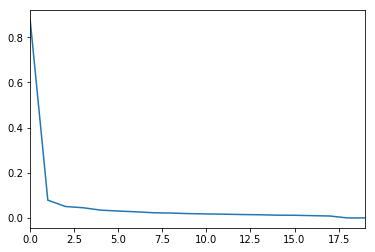

In [70]:
sns.tsplot(svd.singular_values_)

## Check term frequencies

In [71]:
df = pd.DataFrame([[key,value] for key,value in docset.terms_document_frequencies.items()],columns=["Term","Frequency"])

In [72]:
df_high = df[df["Frequency"] > 30].sort_values(by=["Frequency"],ascending=False)

## Plot term frequencies using bokeh

In [73]:
source = ColumnDataSource(df_high)

In [74]:
p = figure(plot_width=1000,plot_height=500,title="Term Frequencies",x_range=df_high["Term"].values,y_range=Range1d(0,df_high["Frequency"].max()))
p.vbar(x="Term",top = "Frequency",width=0.2,source=source)
p.add_tools(HoverTool(tooltips=[("Term","@Term"),("Frequency","@Frequency")]))
show(p)

In [75]:
terms = sorted(df["Term"])
top_n = 20
comp0 = lda.components_[0]
top_indices = comp0.argsort()[-top_n:][::-1]
for index in top_indices:
    print(terms[index],comp0[index])

report 0.033978604
interview 0.032297503
intellig 0.01735439
fbi 0.015792156
jan 0.013550688
interrog 0.01193751
feb 0.011869587
cia 0.0108847
dec 0.01023943
investig 0.010205468
memo 0.0098318895
sept 0.009594158
nsc 0.008677195
bin 0.008660214
apr 0.00835456
oct 0.0076243845
juli 0.006928171
mar 0.006843267
al 0.00669044
meet 0.0066225166


In [76]:
import pyLDAvis

In [77]:
data = {}
data['topic_term_dists'] = lda.components_
data['doc_topic_dists'] = X
data['doc_lengths'] = docset.doc_lengths
data['vocab'] = sorted(df["Term"])
data['term_frequency'] = df["Frequency"]

In [78]:
topic_vis_data = pyLDAvis.prepare(**data,sort_topics=False)

/home/ubuntu/.local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [79]:
pyLDAvis.display(topic_vis_data)